In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
df = pd.read_csv('data.csv')

In [111]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [112]:
columns_used = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',  'Vehicle Style',
       'highway MPG', 'city mpg','MSRP']
df_new = df[columns_used].copy()

In [113]:
df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')

In [114]:
df_new.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [115]:
df_new.fillna(0, inplace=True)

In [116]:
df_new.rename(columns={"msrp":"price"}, inplace=True)

In [117]:
df_new.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

Question 1

What is the most frequent observation (mode) for the column transmission_type\
Answer: automatic

In [118]:
df_new['transmission_type'].describe()

count         11914
unique            5
top       AUTOMATIC
freq           8266
Name: transmission_type, dtype: object

Question 2 

In [119]:
df_new.dtypes != "object"

make                 False
model                False
year                  True
engine_hp             True
engine_cylinders      True
transmission_type    False
vehicle_style        False
highway_mpg           True
city_mpg              True
price                 True
dtype: bool

In [120]:
numerical = df_new.columns[df_new.dtypes != "object"]

In [121]:
numerical

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [122]:
numerical = numerical.delete(5)

In [123]:
numerical

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg'], dtype='object')

In [124]:
df_corr = pd.DataFrame()
for n in numerical:
    df_corr[n] = df_new[numerical].corrwith(df_new[n])

df_corr

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


Q2.Answer: highway_mpg and city_mpg

Make price binary

Now we need to turn the price variable from numeric into a binary format.\
Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.\
Split the data

In [125]:
df_new['price'].mean()

40594.737032063116

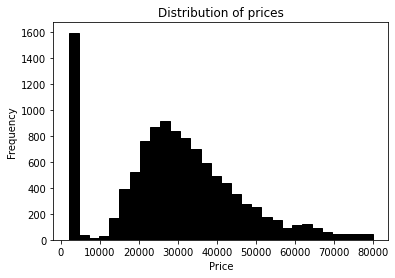

In [126]:
plt.figure(figsize=(6, 4))

sns.histplot(df_new['price'][df_new['price']<80000], bins=30, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [127]:
mean = df_new['price'].mean()

df_new['above_average'] = np.where(df_new['price']>mean,1,0)

In [128]:
df_new['above_average'].value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

In [129]:
df_new['price'][df_new['price']<=mean].count(), df_new['price'][df_new['price']>mean].count()

(8645, 3269)

In [130]:
df_new = df_new.drop('price', axis=1)

In [131]:
df_new

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution.\
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.\
Make sure that the target value (price) is not in your dataframe.

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
df_train_full, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [134]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [135]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [136]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [137]:
df_val

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31,23,0
1,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24,17,1
2,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31,22,0
3,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24,17,0
4,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15,11,0
...,...,...,...,...,...,...,...,...,...,...
2378,Ford,Explorer Sport,2003,203.0,6.0,AUTOMATIC,2dr SUV,19,14,0
2379,Subaru,Outback,2016,175.0,4.0,AUTOMATIC,4dr SUV,33,25,0
2380,GMC,Sonoma,2003,190.0,6.0,MANUAL,Extended Cab Pickup,17,12,0
2381,Aston Martin,V8 Vantage,2015,430.0,8.0,AUTOMATED_MANUAL,Coupe,21,14,1


In [138]:
df_test

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,GMC,Envoy XL,2005,275.0,6.0,AUTOMATIC,4dr SUV,18,13,0
1,Volkswagen,Passat,2016,170.0,4.0,AUTOMATIC,Sedan,38,25,0
2,Honda,Odyssey,2016,248.0,6.0,AUTOMATIC,Passenger Minivan,28,19,0
3,Chevrolet,Cruze,2015,138.0,4.0,MANUAL,Sedan,36,25,0
4,Volvo,740,1991,162.0,4.0,AUTOMATIC,Sedan,20,17,0
...,...,...,...,...,...,...,...,...,...,...
2378,Nissan,350Z,2007,306.0,6.0,MANUAL,Convertible,24,17,0
2379,Ford,Expedition,2016,365.0,6.0,AUTOMATIC,4dr SUV,20,15,1
2380,Acura,ILX,2015,150.0,4.0,AUTOMATIC,Sedan,35,24,0
2381,Volkswagen,Jetta SportWagen,2014,170.0,5.0,MANUAL,Wagon,33,23,0


Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.\
Round the scores to 2 decimals using round(score, 2).\
Which of these variables has the lowest mutual information score?

In [139]:
from sklearn.metrics import mutual_info_score

In [140]:
mutual_info_score(df_train.above_average, df_train.make)

0.23976875439118348

In [141]:
categorical =['make','model','transmission_type','vehicle_style']
for i in categorical:
    print(i, round(mutual_info_score(df_train.above_average, df_train[i]),2))

make 0.24
model 0.46
transmission_type 0.02
vehicle_style 0.08


- Q3.Answer: transmission_type

Question 4

Now let's train a logistic regression.\
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.\
Fit the model on the training dataset.\
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:\
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.\
What accuracy did you get?

In [142]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [143]:
from sklearn.feature_extraction import DictVectorizer

In [144]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [147]:
model.predict_proba(X_val)

array([[9.99154573e-01, 8.45426579e-04],
       [3.65807694e-03, 9.96341923e-01],
       [9.99850183e-01, 1.49816720e-04],
       ...,
       [9.99737589e-01, 2.62411354e-04],
       [1.02990295e-02, 9.89700971e-01],
       [1.23799943e-02, 9.87620006e-01]])

In [148]:
y_pred > 0.5

array([False,  True, False, ..., False,  True,  True])

In [149]:
y_pred = model.predict_proba(X_val)[:,1]

In [150]:
morethan_avg = y_pred > 0.5

In [152]:
round((y_val == morethan_avg).mean(),2)

0.95

In [167]:
accuracy = (y_val == morethan_avg).mean()

In [169]:
accuracy

0.9450272765421738

- Q.4 Answer: 0.95

Question 5

Let's find the least useful feature using the feature elimination technique.\
Train a model with all these features (using the same parameters as in Q4).\
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.\
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.\
Which of following feature has the smallest difference?

In [161]:
features = list(numerical)+categorical
features

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'make',
 'model',
 'transmission_type',
 'vehicle_style']

In [168]:
for f in features:
    subset = features.copy()
    subset.remove(f)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = (y_val == (y_pred > 0.5)).mean()
    print("Feature eliminated:", f, "\nDifference:", accuracy - score, "New Accuracy", score)

Feature eliminated: year 
Difference: -0.002937473772555599 New Accuracy 0.9479647503147294
Feature eliminated: engine_hp 
Difference: 0.01720520352496857 New Accuracy 0.9278220730172052
Feature eliminated: engine_cylinders 
Difference: -0.0008392782207301552 New Accuracy 0.9458665547629039
Feature eliminated: highway_mpg 
Difference: -0.0016785564414603105 New Accuracy 0.9467058329836341
Feature eliminated: city_mpg 
Difference: 0.012589173310952662 New Accuracy 0.9324381032312211
Feature eliminated: make 
Difference: -0.0016785564414603105 New Accuracy 0.9467058329836341
Feature eliminated: model 
Difference: 0.020981955518254325 New Accuracy 0.9240453210239195
Feature eliminated: transmission_type 
Difference: 0.0 New Accuracy 0.9450272765421738
Feature eliminated: vehicle_style 
Difference: 0.012589173310952662 New Accuracy 0.9324381032312211


- Q.5 Answer: transmision_type

Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn.\
We'll need to use the original column price. Apply the logarithmic transformation to this column.\
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.\
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].\
Round your RMSE scores to 3 decimal digits.\
Which of these alphas leads to the best RMSE on the validation set?

In [170]:
df_new = df[columns_used].copy()

In [171]:
df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')
df_new.fillna(0, inplace=True)
df_new.rename(columns={"msrp":"price"}, inplace=True)

In [172]:
df_new['price']=np.log1p(df_new['price'])

In [173]:
df_train_full, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [174]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [176]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [177]:
del df_train['price']
del df_val['price']
del df_test['price']

In [178]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [179]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [180]:
#@ RIDGE REGRESSION IMPLEMENTATION:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

C:\Users\x230252\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.4868


C:\Users\x230252\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.4868


C:\Users\x230252\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.4868


C:\Users\x230252\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.4868
10 0.487


C:\Users\x230252\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- Q.6 Answer 0